# Homework 1. Exploratory Data Analysis, (Prob 3)

Homework Based on Harvard CS109

All work should be your own.

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data

[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 

#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), for stats

---

In [128]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import xlrd
import requests
from io import BytesIO
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import urllib

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. Download the ipython notebook, fill in and submit in blackboard.

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [129]:


import scipy

def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    return X.sf(a) / Y.sf(a)

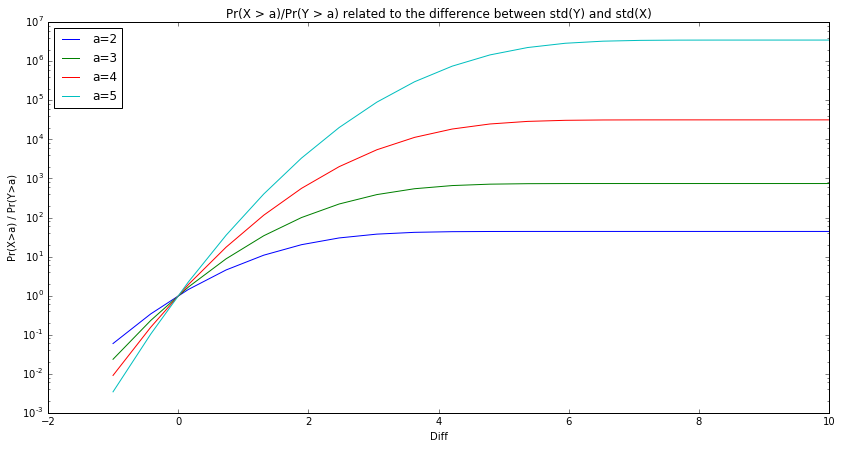

In [130]:
diffs = np.linspace(-1,10,20)
A = range(2,6)

plt.figure(figsize=(14,7));
for a in A:
    plt.plot(diffs, [ratioNormals(diff, a) for diff in diffs])
    

plt.yscale('log')
plt.legend(['a='+str(a) for a in A], loc=0)
plt.xlabel('Diff')
plt.ylabel('Pr(X>a) / Pr(Y>a)')
plt.title('Pr(X > a)/Pr(Y > a) related to the difference between std(Y) and std(X)')
plt.show()

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? Use the year 2012. 

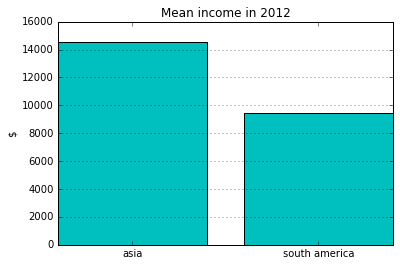

In [131]:
request = requests.get('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv', verify=True)
countries = pd.read_csv(BytesIO(request.content))
countries.head()

request = requests.get('http://www.gapminder.org/documentation/documentation/gapdata001%20v14.xlsx')
income = pd.read_excel(BytesIO(request.content), sheetname=1)
income = income.loc[:,['Area', 'Year', 'GDP per capita - with interpolations']]



def mergeByYear(yr):
    yr_income = income[income.Year == yr]
    yr_income = yr_income.rename(columns={'Area': 'Country', 'GDP per capita - with interpolations': 'Income'})
    yr_income = yr_income.loc[:,['Country', 'Income']]  
    join = pd.merge(countries, yr_income, on=['Country'], how='inner')
    return join
    



def meanIncome(region, year):
    data_year = mergeByYear(year)
    data_region = data_year[data_year.Region==region]
    incomes = data_region.loc[:,['Income']]
    values = [v[0] for v in incomes.values]
    return np.mean(values)


plt.xticks([1,2], ['asia', 'south america'])
plt.bar([1,2], [meanIncome('ASIA', 2012),meanIncome('SOUTH AMERICA', 2012)], color = 'c', align='center')

plt.ylabel('$')
plt.title('Mean income in 2012')
plt.gca().yaxis.grid(True)
plt.figure(figsize=(8,4));
plt.show()

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a). Use the year 2012. 

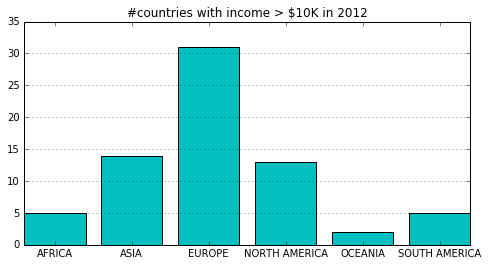

In [132]:
def NumRichCountries(region, year, x):
    data = mergeByYear(year)
    return len(data[(data.Region==region) & (data.Income>x)])

regions = mergeByYear(2012)['Region'].unique()

values = [NumRichCountries(region, 2012, 10000) for region in regions]

plt.figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
plt.xticks(range(len(regions)), regions)
plt.bar(range(len(regions)), values, color = 'c', align='center')

plt.title('#countries with income > $10K in 2012')
plt.gca().yaxis.grid(True)

plt.show()

#### Problem 3(d)

Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [133]:
data_set = pd.read_csv("IGPD.csv")
data_set.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


In [134]:
pop_2012         = data_set.loc[:,['Total population', '2012']]
pop_2012         = pop_2012.rename(columns = {'Total population':'Country', '2012': 'Population'})
pop_2012.head()

,Country,Population
0,Abkhazia,NaN
1,Afghanistan,29726803
2,Akrotiri and Dhekelia,NaN
3,Albania,2880667
4,Algeria,37439427


In [135]:
income_2012 = mergeByYear(2012)
income_2012.head()

,Country,Region,Income
0,Algeria,AFRICA,6.4e+03
1,Angola,AFRICA,5.8e+03
2,Benin,AFRICA,1.5e+03
3,Botswana,AFRICA,1.4e+04
4,Burundi,AFRICA,4.8e+02


In [136]:
concat = pd.merge(income_2012, pop_2012, on=['Country'], how='left')
print(concat.shape)
k_concat = concat.dropna()
k_concat.shape

(177, 4)


(165, 4)

In [137]:
#convert the population to numbers instead of strings
k_concat.Population = k_concat.Population.convert_objects(convert_numeric=True)
k_concat.head()

,Country,Region,Income,Population
0,Algeria,AFRICA,6.4e+03,3.7e+07
1,Angola,AFRICA,5.8e+03,2.3e+07
2,Benin,AFRICA,1.5e+03,1e+07
3,Botswana,AFRICA,1.4e+04,2.1e+06
4,Burundi,AFRICA,4.8e+02,1e+07


In [138]:
import warnings
warnings.filterwarnings('ignore')
k_concat['IncomeByPop'] = k_concat['Income']*k_concat['Population']
k_concat.head()

,Country,Region,Income,Population,IncomeByPop
0,Algeria,AFRICA,6.4e+03,3.7e+07,2.4e+11
1,Angola,AFRICA,5.8e+03,2.3e+07,1.3e+11
2,Benin,AFRICA,1.5e+03,1e+07,1.5e+10
3,Botswana,AFRICA,1.4e+04,2.1e+06,3e+10
4,Burundi,AFRICA,4.8e+02,1e+07,4.9e+09


In [139]:
get_regions = k_concat.groupby('Region').sum()
get_regions = get_regions.reset_index()
get_regions

,Region,Income,Population,IncomeByPop
0,AFRICA,1.8e+05,9.8e+08,2.9e+12
1,ASIA,5.5e+05,2.3e+09,1.1e+13
2,EUROPE,8.9e+05,3e+08,5.7e+12
3,NORTH AMERICA,2.5e+05,2.3e+08,3.2e+12
4,OCEANIA,9.3e+04,1.4e+07,1.4e+11
5,SOUTH AMERICA,1.1e+05,3.8e+08,4e+12


In [140]:
get_regions['PerPerson'] = get_regions['IncomeByPop'] / get_regions['Population']
get_regions

,Region,Income,Population,IncomeByPop,PerPerson
0,AFRICA,1.8e+05,9.8e+08,2.9e+12,3e+03
1,ASIA,5.5e+05,2.3e+09,1.1e+13,4.8e+03
2,EUROPE,8.9e+05,3e+08,5.7e+12,1.9e+04
3,NORTH AMERICA,2.5e+05,2.3e+08,3.2e+12,1.4e+04
4,OCEANIA,9.3e+04,1.4e+07,1.4e+11,1e+04
5,SOUTH AMERICA,1.1e+05,3.8e+08,4e+12,1e+04


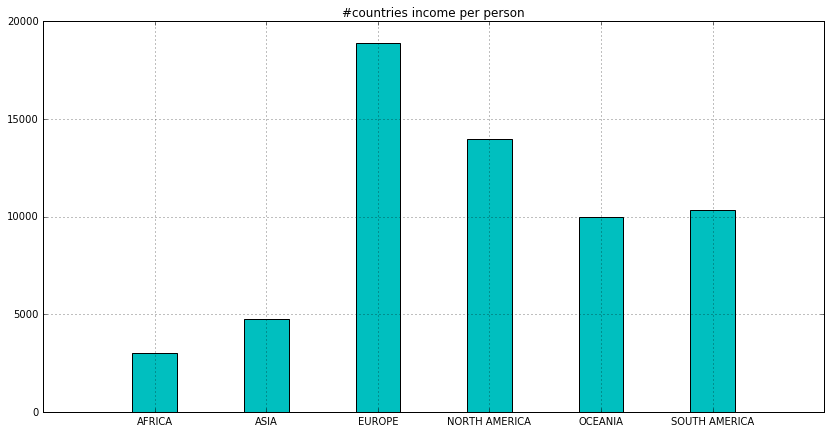

In [142]:
plt.figure(num=None, figsize=(14, 7), dpi=300, facecolor='w', edgecolor='k')
plt.bar(range(len( get_regions.Region)), get_regions['PerPerson'].values,    width=0.4, align='center', color='c')
plt.xticks(range(len(get_regions.Region)),get_regions.Region.values)
plt.grid(True)
plt.title('#countries income per person')
plt.show()

## Discussion for Problem 3

The results are different: in 3c is showed that Europe has the most countries with income more than 10k with North America coming in third behind asia; however, in 3d it showed that Europe has the most contries with wealthy individuals, coming in second is North America and second to last is Asia which is completely different from the first survey. Therefore, this shows that Europe has lots of countries wealthy individual and the wealth is well distributed and in contrast, North America has only few countries with enough wealthy individual to make up the difference (wealth not well distributed).